# Шаг 1. Загрузите данные

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
data.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
#приведем к нижнему регистру название столбцов
data.columns = data.columns.str.lower()

In [5]:
data.head(5)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


# Шаг 2. Проведите исследовательский анализ данных (EDA)

In [6]:
#посмотрим информацию про таблицу
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Пропущенных значений нет

In [7]:
#Посмотрим на дубликаты
data.duplicated().sum()

0

Дубликатов тоже нет

In [8]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Вывод:

Распределение по полу примерно одинаково

Большинство клиентов 85% живет или работает рядом с фитнес-клубом

Примерно половина клиентов являются сотрудниками партнерских организаций

Около 30% клиентов пришли по программе "Приведи друга"

Известны мобильные номера примерно 90% клиентов

Средняя длительность абонементов клиентов - 4.6 месяцев

Около 40% клиентов посещают групповые занятия

Средний возраст клиентов 29 лет

Средние дополнительные расходы на клиента - 146

Средний срок до окончания договора - 4.3 месяцев

Среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев

Средняя частота посещений за все время - 1.87 раз в неделю

Средняя частота посещений за последний месяц - 1.76 раз в неделю

Доля оттока - 27%

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался 

In [9]:
data.groupby('churn').agg('mean')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Распределение по полу не отличается

Ближе живущие или работающие клиенты реже попадают в отток

Сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб чем остальные клиенты

Клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят в отток

Наличие мобильного номера клиента не отличается в группах

Средняя длительность договора  больше у оставшихся пользователей, у большей части клиентов в оттоке срок договора составляет 1 месяц (скорее это говорит о том, что чаще клиенты заключают договор на 1 месяц).

Оставшиеся пользователи чаще ходят на групповые занятия 


У групп есть разница в среднем возрасте клиентов

Есть небольшое различие в выручке от других услуг фитнес-центра

Оставшееся время до окончания срока действия договора  больше у оставшихся клиентов.

У клиентов в оттоке меньше среднее количество посещений в неделю за всё время

Количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался.

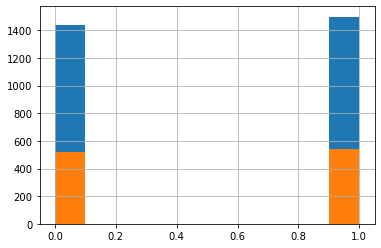

In [10]:
h = data.groupby('churn')['gender'].hist()


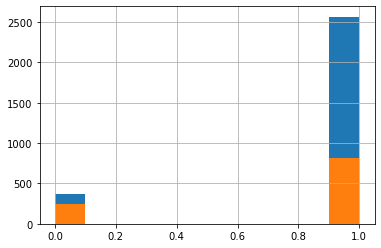

In [11]:
data.groupby('churn')['near_location'].hist();

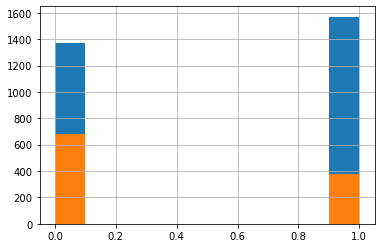

In [12]:
data.groupby('churn')['partner'].hist();

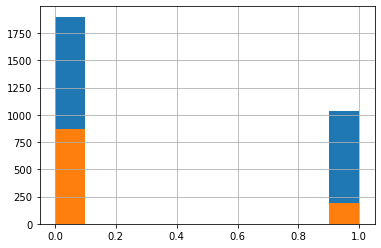

In [13]:
data.groupby('churn')['promo_friends'].hist();

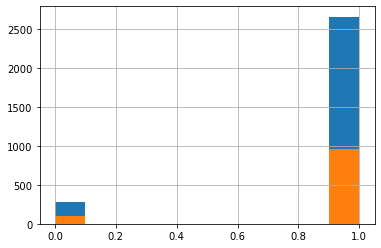

In [14]:
data.groupby('churn')['phone'].hist();

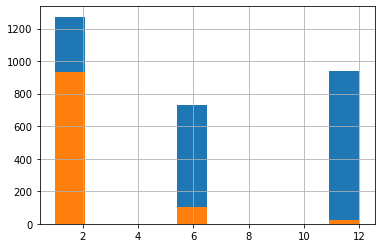

In [15]:
data.groupby('churn')['contract_period'].hist();

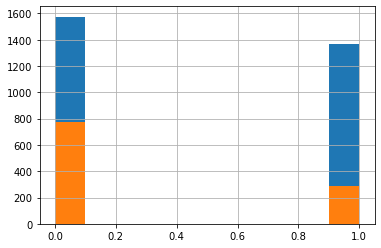

In [16]:
data.groupby('churn')['group_visits'].hist();

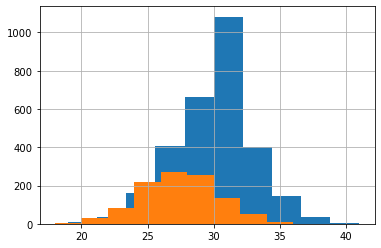

In [17]:
data.groupby('churn')['age'].hist();

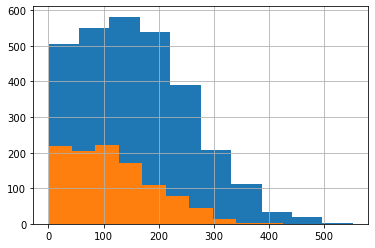

In [18]:
data.groupby('churn')['avg_additional_charges_total'].hist();

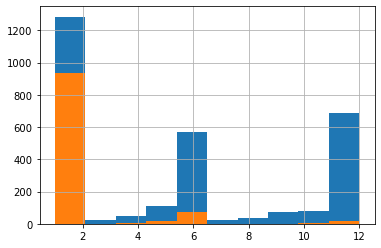

In [19]:
data.groupby('churn')['month_to_end_contract'].hist();

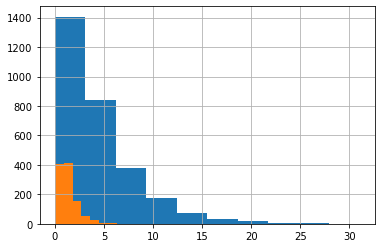

In [20]:
data.groupby('churn')['lifetime'].hist();

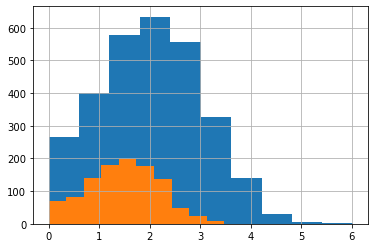

In [21]:
data.groupby('churn')['avg_class_frequency_total'].hist();

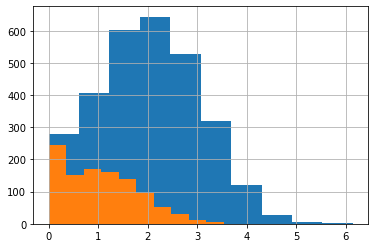

In [22]:
data.groupby('churn')['avg_class_frequency_current_month'].hist();

Построим матрицу корреляций 

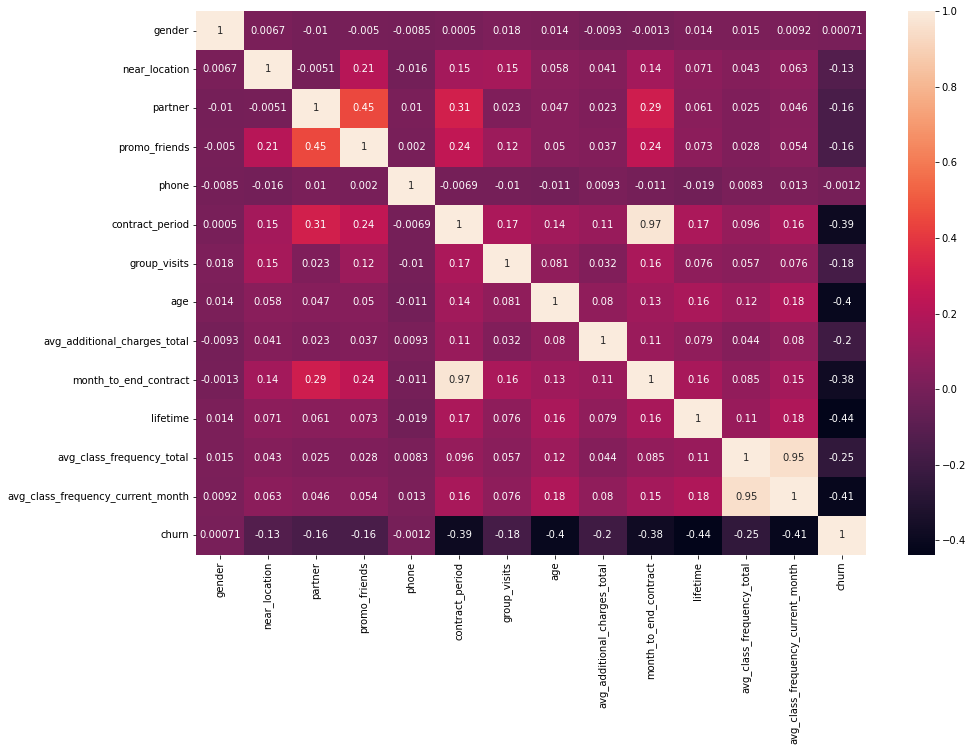

In [23]:
corr = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot = True)
plt.show()

Есть мультиколлинеарные признаки:

* contract_period - month_to_end_contract

* avg_class_frequency_current_month

* avg_class_frequency_total

Есть признаки с нулевой корреляцией с целевой переменной:

* phone

* gender

# Шаг 3. Постройте модель прогнозирования оттока клиентов

In [24]:
X = data.drop('churn', axis = 1)
y = data['churn']

Логическая регрессия

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [27]:
predictions = model.predict(X_test)
probabilities =  model.predict_proba(X_test)[:,1]

In [28]:
print('Accuracy | Нет баланса классов: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy | Нет баланса классов: 0.91
Precision: 0.81
Recall: 0.80
F1: 0.81


Случайный лес

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [30]:
print('Accuracy | Нет баланса классов: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy | Нет баланса классов: 0.92
Precision: 0.84
Recall: 0.81
F1: 0.83


Доля правильных прогнозов и полнота чуть выше в модели логистической регрессии

Регрессия лучше.

# Шаг 4. Сделайте кластеризацию клиентов

Построение иерархической кластеризации

In [31]:
data_cl = data.drop(['churn'], axis=1)
data_columns_list = data_cl.columns
data_cl = StandardScaler().fit_transform(data_cl)
data_cl = pd.DataFrame(data_cl, columns = data_columns_list).astype('float64')

In [32]:
data_cl.head(5)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0.979706,0.427881,1.026861,1.497161,-3.059852,0.289890,1.194032,-0.056554,-1.377531,0.161605,-0.193329,-1.911920,-1.678472
1,-1.020715,0.427881,-0.973842,-0.667931,0.326813,1.608822,1.194032,0.557327,-0.350213,1.831941,0.873680,0.045176,0.136014
2,-1.020715,0.427881,1.026861,-0.667931,0.326813,-0.809219,-0.837498,-0.363494,-0.181592,-0.792873,-0.460081,-0.020493,-0.029019
3,-1.020715,0.427881,1.026861,1.497161,0.326813,1.608822,1.194032,1.171208,-0.874722,1.831941,-0.460081,1.364655,1.510450
4,0.979706,0.427881,1.026861,1.497161,0.326813,-0.809219,-0.837498,-0.977375,0.533700,-0.792873,-0.193329,-0.787076,-0.614542


In [33]:
linked = linkage(data_cl, method = 'ward')

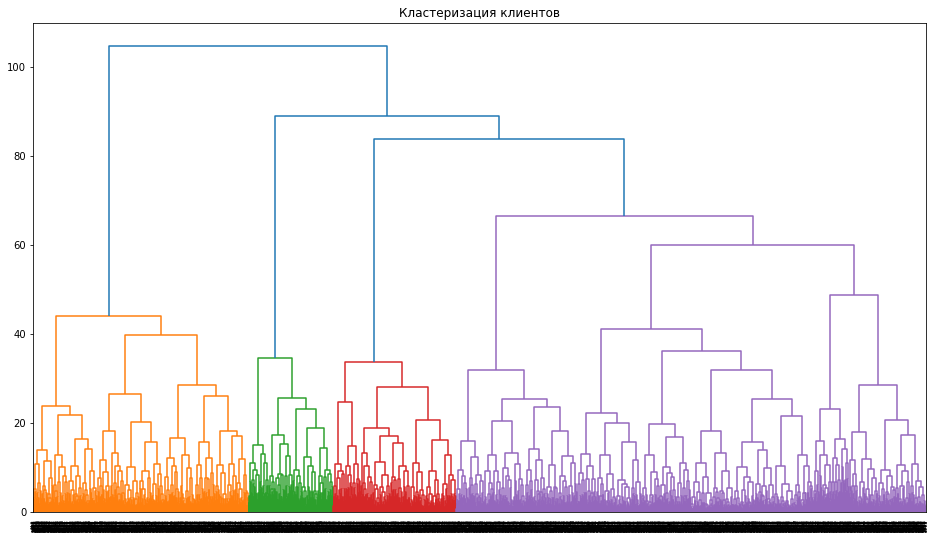

In [34]:
plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация клиентов')
plt.show()

Предположим, что кластеров 5

In [35]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters = 5, random_state=0)
# прогнозируем кластеры для наблюдений 
labels = km.fit_predict(data_cl)
# сохраняем метки кластера в поле нашего датасета
data['cluster'] = labels

In [36]:
data.cluster.value_counts()

3    1262
0    1010
4     838
2     505
1     385
Name: cluster, dtype: int64

In [37]:
data.groupby('cluster').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Кластер 0
Отток - 3% - самый низкий
Живут или работают недалеко от фитнес-центра
Преобладают сотрудники компаний-партнеров - 78%
Заключают договора на длительный срок - 12 месяцев
Чаще всех посещают групповые занятия - 54%
Чаще всех пришли по промо акции

Кластер 1
Отток - 26%
Живут или работают недалеко от фитнес-центра
Нет мобильного номера
В среднем 4.5 месяцев контракты

Кластер 2
Отток - 44%
Похожи на кластер 0, но живут или работают в другом районе
Низкий % - 7% пришли по промо акции
Реже всех посещают групповые занятия

Кластер 3
Отток - 52% - самый высокий
Живут или работают недалеко от фитнес-центра
В основном обладатели недолгосрочных абонементов на 1-3 месяца
Наименьшее кол-во посещений за всё время и в последний месяц

Кластер 4
Отток - 7%
Живут или работают недалеко от фитнес-центра
Чаще всех посещают клуб - 2.81 раз в неделю
Договора не на длительный срок - в среднем 2.8 месяцев

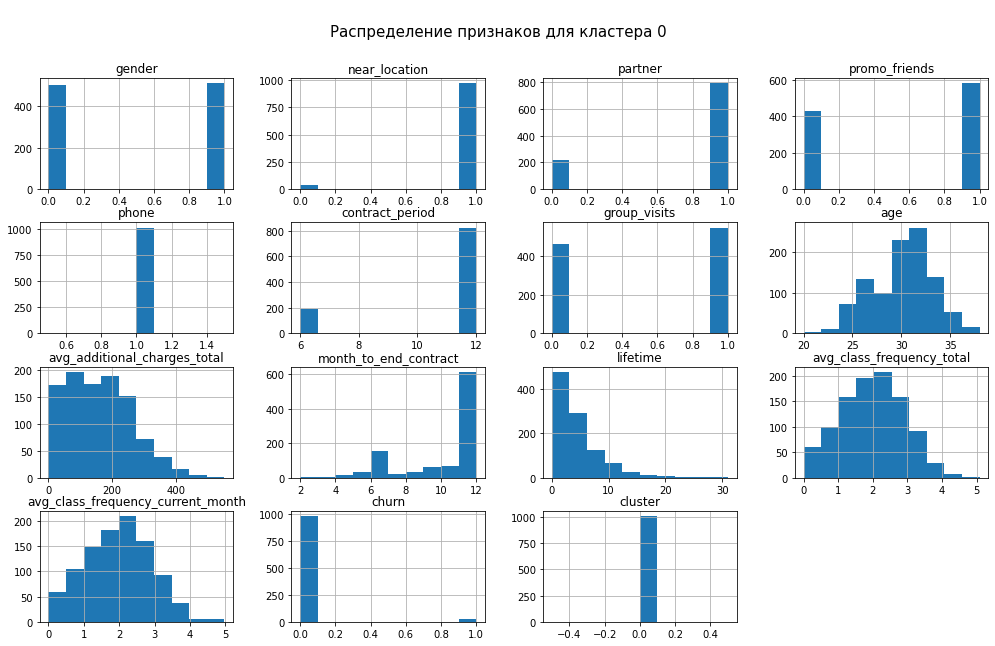

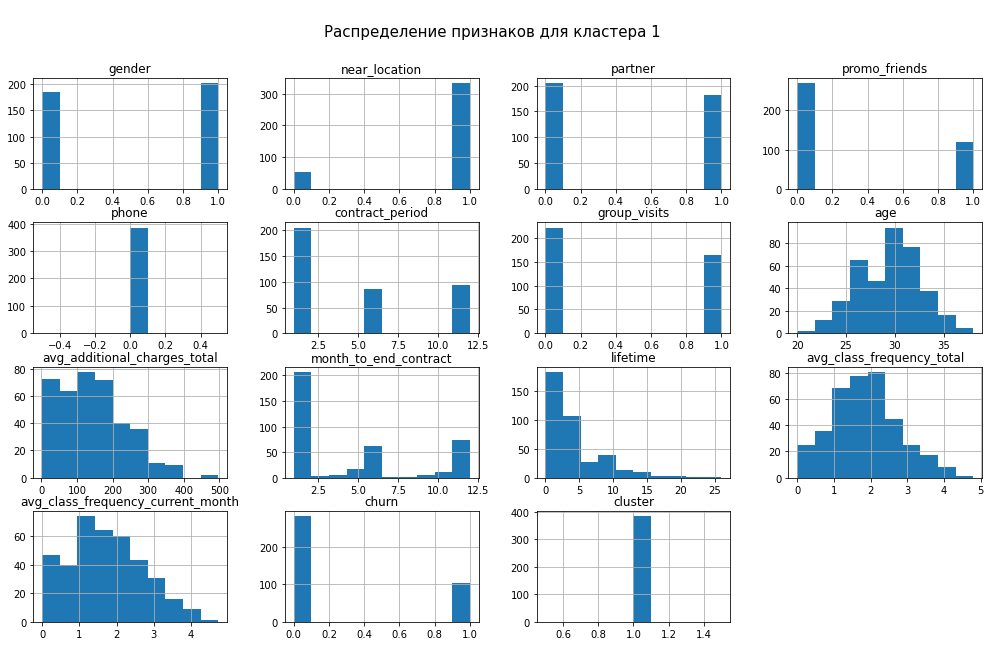

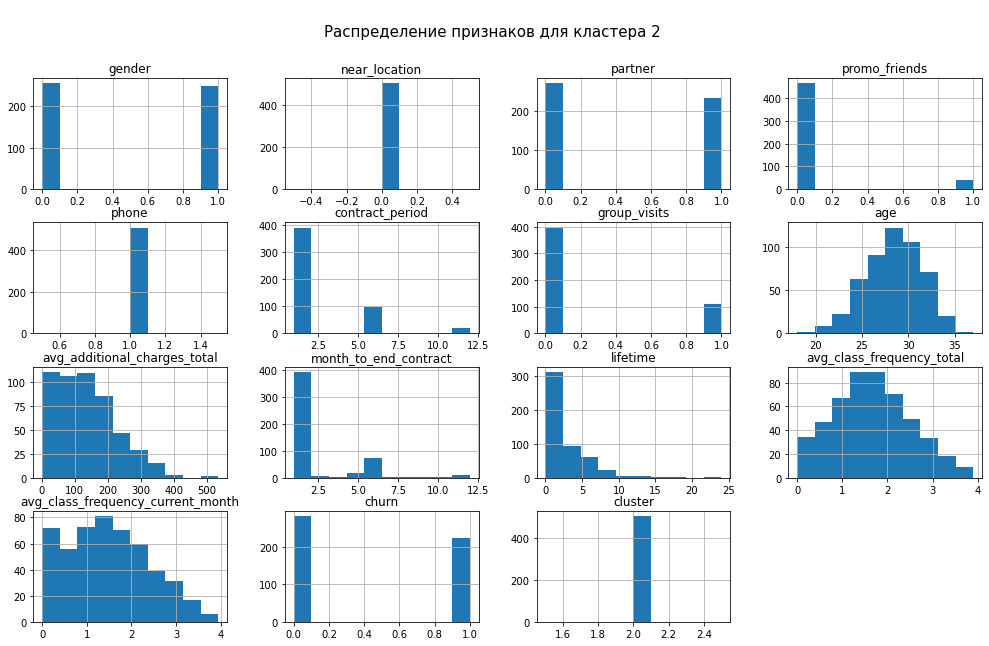

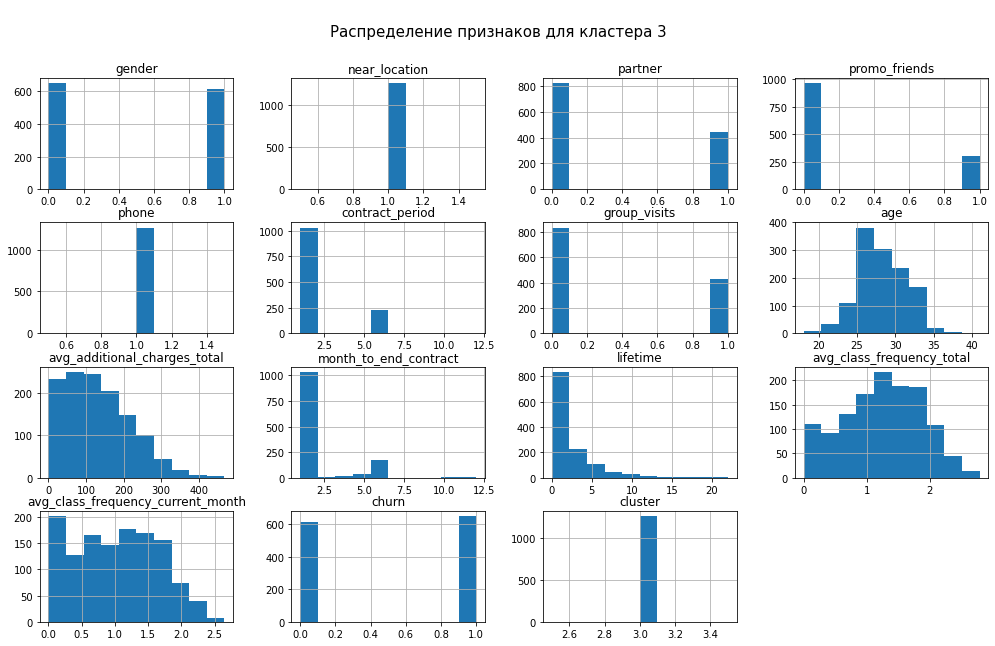

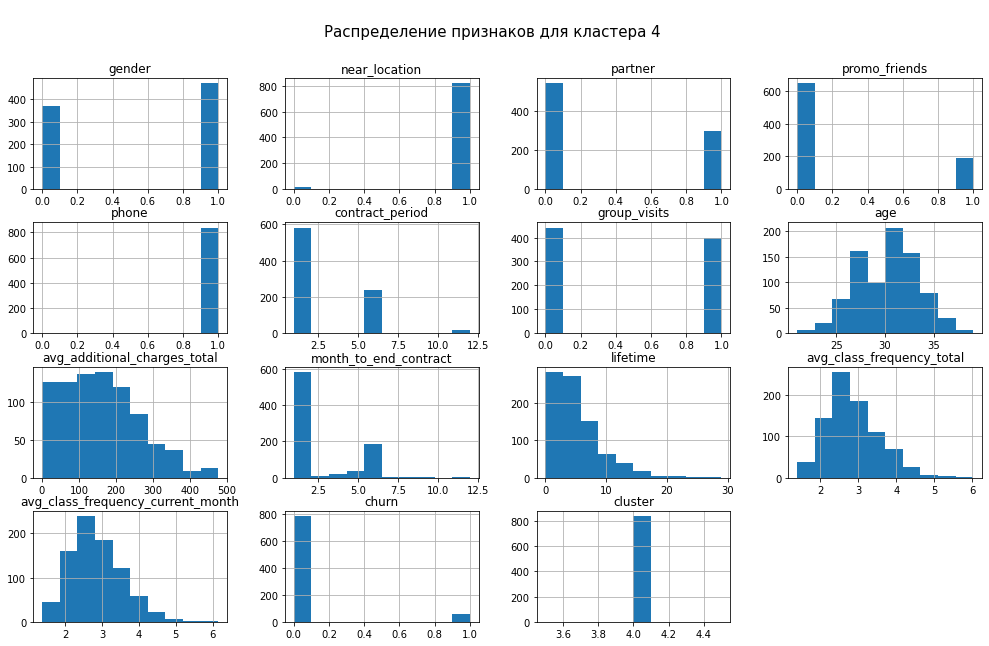

In [44]:
for value in [0, 1, 2, 3, 4]:
  data[data['cluster']==value].hist(figsize=(17,10))
  plt.suptitle('\nРаспределение признаков для кластера {}'.format(value), fontsize = 15)
  plt.show()

# Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами

Выводы на основе отличий признаков у клиентов, попавших в отток и оставшихся:

* Распределение по половому признаку не отличается
* Ближе живущие или работающие клиенты реже попадают в отток, что вполне логично
* Сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб чем остальные клиенты
* Клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят в отток
* Наличие мобильного номера клиента не отличается в группах
* Средняя длительность договора полне логично больше у оставшихся пользователей, у большей части клиентов в оттоке срок договора составляет 1 месяц (скорее это говорит о том, что чаще клиенты заключают договор на 1 месяц).
* Оставшиеся пользователи чаще ходят на групповые занятия (хотя возможно, что в отток попали те, кто еще не успел начать ходить на них)
* У групп есть разница в среднем возрасте клиентов
* Есть небольшое различие в выручке от других услуг фитнес-центра
* Оставшееся время до окончания срока действия договора логично больше у оставшихся клиентов.
* У клиентов в оттоке меньше среднее количество посещений в неделю за всё время
* Количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке

Мы разбили всех наших клиентов на 5 групп

Как выяснилось, большинство клиентов живет или работает неподалеку от фитнес-центра.

Кластер 0
* Отток - 3% - самый низкий
* Живут или работают недалеко от фитнес-центра
* Преобладают сотрудники компаний-партнеров - 78%
* Заключают договора на длительный срок - 12 месяцев
* Чаще всех посещают групповые занятия - 54%
* Чаще всех пришли по промо акции

Кластер 1
* Отток - 26%
* Живут или работают недалеко от фитнес-центра
* Нет мобильного номера
* В среднем 4.5 месяцев контракты

Кластер 2
* Отток - 44%
* Похожи на кластер 0, но живут или работают в другом районе
* Низкий % - 7% пришли по промо акции
* Реже всех посещают групповые занятия

Кластер 3
* Отток - 52% - самый высокий
* Живут или работают недалеко от фитнес-центра
* В основном обладатели недолгосрочных абонементов на 1-3 месяца
* Наименьшее кол-во посещений за всё время и в последний месяц

Кластер 4
* Отток - 7%
* Живут или работают недалеко от фитнес-центра
* Чаще всех посещают клуб - 2.81 раз в неделю
* Договора не на длительный срок - в среднем 2.8 месяцев

Рекомендации:

* Глубже сегментировать оттекающих клиентов, к каждому сегменту тестировать индивидуальные предложения.
* Построить продуктивную систему аналитики и действовать не после оттока, а до него.

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Итоговый комментарий ревьюера ✔️</b>
       
Отличная работа! Ты хорошо проанализировала поведение ушедших и оставшихся клиентов, дальше посмотрели на корреляцию, где выявили мультиколлинеарность, далее применили машинное обучение для прогноза оттока клиентов. Следующим этапом ты определила кластеры и описала характерное поведение каждого. Код аккуратный, выводы корректные, структура соблюдается, предложенная маркетинговая стратегия интересная!  
    
Можно двигаться дальше, успехов!  
    
----  
    
Оставлю дополнительный материал по "анализу выживаемости", достаточно интересный инструмент, рекомендую познакомиться)  
    
Ссылка: https://www.youtube.com/watch?v=vaFTwxjdLGQ&t=2992s
    
</div>



<div class="alert alert-block alert-warning"; style="border-left: 6px solid orange">
<b>Комментарий ревьюера ⚠️</b>
       
Принимаю проект, но отправлю как на доработку, что бы была возможность задать вопросы) Если вопросов нет, то можешь просто отправить работу мне обратно и я ее приму)
    
</div>

<div class="alert alert-block alert-info">
<b>Александр, спасибо большое за проверку и рекомендации, буду работать</div>